<div style="border-radius: 10px; border: #0b0265 solid; background-color: #F0F8BB; font-size: 1.1em; letter-spacing: 0.5px; text-align: center;">
  <h1 style="color: #212529; font-weight: bold; font-family: Arial, sans-serif;">Predicting Rainfall in Sydney Using Machine Learning: A Case Study for The Daily Buzz</h1>
</div>

### Company Background:

The Daily Buzz is a reputed newspaper company based in Sydney, known for its high-quality journalism and commitment to truth. Over the years, it has become one of the most widely read and respected sources of news and information in the region. In an effort to attract more readers and stay ahead of the competition, The Daily Buzz decided to launch a new weather prediction column called "The Weather Oracle". To enhance the accuracy of their weather predictions, the newspaper has turned to machine learning.

### Problem Statement:

The Daily Buzz aims to improve the accuracy of its weather predictions, specifically focusing on rainfall. They want to leverage machine learning techniques, particularly ensemble methods, to create a model that can accurately predict whether it will rain tomorrow in Sydney. The goal is to use various classification models and ensemble techniques to find the best-performing model for rainfall prediction.

### About the Data:

The dataset provided contains weather information for Sydney from 2008 to 2017. It consists of 18 columns, each representing different weather attributes:

* Date: The date of observation.
* Location: The common name of the location of the weather station.
* MinTemp: The minimum temperature in degrees Celsius.
* MaxTemp: The maximum temperature in degrees Celsius.
* Rainfall: The amount of rainfall recorded for the day in mm.
* Evaporation: The Class A pan evaporation (mm) in the 24 hours to 9am.
* Sunshine: The number of hours of bright sunshine in the day.
* Humidity 9am: Humidity (percent) at 9am.
* Humidity 3pm: Humidity (percent) at 3pm.
* Pressure 9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am.
* Pressure 3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm.
* Cloud 9am: Fraction of sky obscured by cloud at 9am measured in "oktas".
* Cloud 3pm: Fraction of sky obscured by cloud at 3pm measured in "oktas".
* Temp 9am: Temperature (degrees C) at 9am.
* Temp 3pm: Temperature (degrees C) at 3pm.
* RainToday: Boolean indicating if precipitation in the 24 hours to 9am exceeds 1mm.
* RainTomorrow: Boolean indicating if it will rain the next day.

### ML Models to perform the task

* Logistic Regression
* Linear Disciminant Model
* K-Nearest Neighbors
* Decision Tree Classifier
* Bagging Classification
* Random Forest Classifier
* Gradient Boosting
* ADA Boosting Classifier
* XGBoost Classification

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\91812\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
df = pd.read_csv('sydney_rain prediction.csv', header = 0)

In [7]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-02-2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  02-02-2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  03-02-2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  04-02-2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  05-02-2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [8]:
df.replace('Yes', 1, inplace=True)
df.replace('No', 0, inplace= True)

In [9]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-02-2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  02-02-2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  03-02-2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  04-02-2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  05-02-2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  
0     20.7     20.9        1.0             1  
1     22.4     24.8        1.0             1  
2     23.5     23.0        1.0             1  
3     21.4     20.9        1.0             1  
4     22.5     25.5        1.0             1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   float64
 16  RainTomorrow  3337 non-null   int64  
dtypes: float64(14), int64(1), object(2)
memory usage: 443.3+ KB


In [11]:
# Replacing the null values of data with the respective mean of their variable
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3337 non-null   float64
 3   MaxTemp       3337 non-null   float64
 4   Rainfall      3337 non-null   float64
 5   Evaporation   3337 non-null   float64
 6   Sunshine      3337 non-null   float64
 7   Humidity9am   3337 non-null   float64
 8   Humidity3pm   3337 non-null   float64
 9   Pressure9am   3337 non-null   float64
 10  Pressure3pm   3337 non-null   float64
 11  Cloud9am      3337 non-null   float64
 12  Cloud3pm      3337 non-null   float64
 13  Temp9am       3337 non-null   float64
 14  Temp3pm       3337 non-null   float64
 15  RainToday     3337 non-null   float64
 16  RainTomorrow  3337 non-null   int64  
dtypes: float64(14), int64(1), object(2)
memory usage: 443.3+ KB


In [13]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     01-02-2008   Sydney     19.5     22.4      15.6     6.200000       0.0   
1     02-02-2008   Sydney     19.5     25.6       6.0     3.400000       2.7   
2     03-02-2008   Sydney     21.6     24.5       6.6     2.400000       0.1   
3     04-02-2008   Sydney     20.2     22.8      18.8     2.200000       0.0   
4     05-02-2008   Sydney     19.7     25.7      77.4     5.187432       0.0   
...          ...      ...      ...      ...       ...          ...       ...   
3332  21-06-2017   Sydney      8.6     19.6       0.0     2.000000       7.8   
3333  22-06-2017   Sydney      9.3     19.2       0.0     2.000000       9.2   
3334  23-06-2017   Sydney      9.4     17.7       0.0     2.400000       2.7   
3335  24-06-2017   Sydney     10.1     19.3       0.0     1.400000       9.3   
3336  25-06-2017   Sydney      7.6     19.3       0.0     3.400000       9.4   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            92.0         84.0       1017.6       1017.4       8.0       8.0   
1            83.0         73.0       1017.9       1016.4       7.0       7.0   
2            88.0         86.0       1016.7       1015.6       7.0       8.0   
3            83.0         90.0       1014.2       1011.8       8.0       8.0   
4            88.0         74.0       1008.3       1004.8       8.0       8.0   
...           ...          ...          ...          ...       ...       ...   
3332         73.0         52.0       1025.9       1025.3       2.0       2.0   
3333         78.0         53.0       1028.5       1024.6       2.0       2.0   
3334         85.0         56.0       1020.8       1015.0       6.0       6.0   
3335         56.0         35.0       1017.3       1015.1       5.0       2.0   
3336         73.0         32.0       1018.6       1015.4       1.0       1.0   

      Temp9am  Temp3pm  RainToday  RainTomorrow  
0        20.7     20.9        1.0             1  
1        22.4     24.8        1.0             1  
2        23.5     23.0        1.0             1  
3        21.4     20.9        1.0             1  
4        22.5     25.5        1.0             1  
...       ...      ...        ...           ...  
3332     10.5     17.9        0.0             0  
3333     11.0     18.7        0.0             0  
3334     10.2     17.3        0.0             0  
3335     12.4     19.0        0.0             0  
3336      9.4     18.8        0.0             0  

[3337 rows x 17 columns]

In [14]:
# Removing unecessary columns
del df['Date']
del df['Location']

In [15]:
df_corr = df.corr()

In [16]:
df_corr

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp       1.000000  0.770701  0.012866     0.567623 -0.062959   
MaxTemp       0.770701  1.000000 -0.139837     0.509060  0.325107   
Rainfall      0.012866 -0.139837  1.000000    -0.100468 -0.306119   
Evaporation   0.567623  0.509060 -0.100468     1.000000  0.174467   
Sunshine     -0.062959  0.325107 -0.306119     0.174467  1.000000   
Humidity9am   0.052362 -0.186875  0.330469    -0.394166 -0.489019   
Humidity3pm   0.270944 -0.152310  0.301337    -0.101849 -0.582792   
Pressure9am  -0.393024 -0.388533 -0.036988    -0.345700 -0.046391   
Pressure3pm  -0.355764 -0.424653  0.003210    -0.300285 -0.094322   
Cloud9am      0.236288 -0.087381  0.242049    -0.037598 -0.660555   
Cloud3pm      0.163519 -0.099167  0.200732    -0.037739 -0.676397   
Temp9am       0.938814  0.858986 -0.055974     0.605348  0.114663   
Temp3pm       0.752410  0.960026 -0.143491     0.473879  0.343563   
RainToday     0.018884 -0.187694  0.555191    -0.228432 -0.366306   
RainTomorrow  0.079962 -0.149269  0.293808    -0.064301 -0.521637   

              Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
MinTemp          0.052362     0.270944    -0.393024    -0.355764  0.236288   
MaxTemp         -0.186875    -0.152310    -0.388533    -0.424653 -0.087381   
Rainfall         0.330469     0.301337    -0.036988     0.003210  0.242049   
Evaporation     -0.394166    -0.101849    -0.345700    -0.300285 -0.037598   
Sunshine        -0.489019    -0.582792    -0.046391    -0.094322 -0.660555   
Humidity9am      1.000000     0.658120     0.263146     0.251304  0.423560   
Humidity3pm      0.658120     1.000000     0.154352     0.183056  0.453697   
Pressure9am      0.263146     0.154352     1.000000     0.960460 -0.011072   
Pressure3pm      0.251304     0.183056     0.960460     1.000000  0.018972   
Cloud9am         0.423560     0.453697    -0.011072     0.018972  1.000000   
Cloud3pm         0.331734     0.471684    -0.040115    -0.002903  0.608995   
Temp9am         -0.147977     0.128479    -0.418943    -0.404472  0.088428   
Temp3pm         -0.157149    -0.213727    -0.345926    -0.392218 -0.089334   
RainToday        0.399662     0.342386    -0.000356     0.056745  0.316351   
RainTomorrow     0.329011     0.471250    -0.032465     0.010977  0.329525   

              Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  
MinTemp       0.163519  0.938814  0.752410   0.018884      0.079962  
MaxTemp      -0.099167  0.858986  0.960026  -0.187694     -0.149269  
Rainfall      0.200732 -0.055974 -0.143491   0.555191      0.293808  
Evaporation  -0.037739  0.605348  0.473879  -0.228432     -0.064301  
Sunshine     -0.676397  0.114663  0.343563  -0.366306     -0.521637  
Humidity9am   0.331734 -0.147977 -0.157149   0.399662      0.329011  
Humidity3pm   0.471684  0.128479 -0.213727   0.342386      0.471250  
Pressure9am  -0.040115 -0.418943 -0.345926  -0.000356     -0.032465  
Pressure3pm  -0.002903 -0.404472 -0.392218   0.056745      0.010977  
Cloud9am      0.608995  0.088428 -0.089334   0.316351      0.329525  
Cloud3pm      1.000000  0.067630 -0.145863   0.260707      0.413217  
Temp9am       0.067630  1.000000  0.828669  -0.074480     -0.000721  
Temp3pm      -0.145863  0.828669  1.000000  -0.188553     -0.188951  
RainToday     0.260707 -0.074480 -0.188553   1.000000      0.341182  
RainTomorrow  0.413217 -0.000721 -0.188951   0.341182      1.000000

<AxesSubplot:>

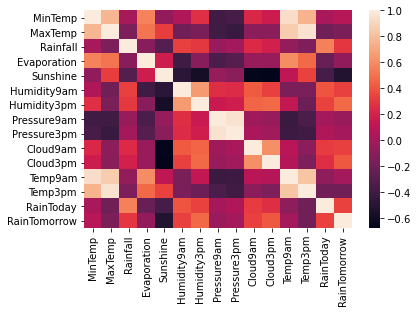

In [17]:
sns.heatmap(data = df_corr)

In [18]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.551593     4.493290     9.886270     2.756095     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.053668    16.261752     7.000492     7.012157     2.505491   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  3337.000000  3337.000000  3337.000000  3337.000000   3337.000000  
mean      4.218660    17.819742    21.533333     0.259982      0.259215  
std       2.409531     4.894240     4.301156     0.438296      0.438269  
min       0.000000     6.400000    10.200000     0.000000      0.000000  
25%       2.000000    13.800000    18.400000     0.000000      0.000000  
50%       4.218660    18.200000    21.300000     0.000000      0.000000  
75%       7.000000    21.700000    24.500000     1.000000      1.000000  
max       8.000000    36.500000    44.700000     1.000000      1.000000

### Outlier's Treatment

C:\Users\91812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MinTemp'>

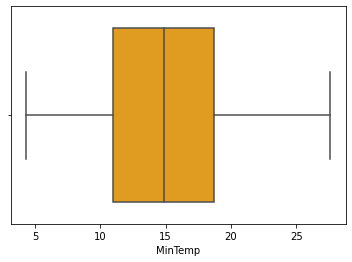

In [28]:
# To see the outliers
sns.boxplot(df['MinTemp'], color = 'orange')

C:\Users\91812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MaxTemp'>

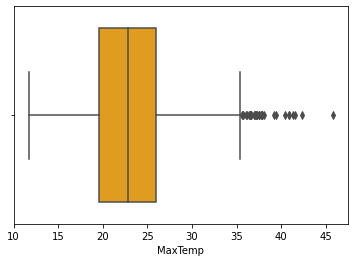

In [29]:
sns.boxplot(df['MaxTemp'], color = 'orange')

C:\Users\91812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall'>

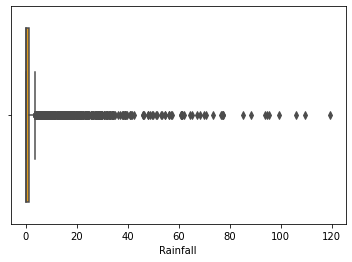

In [30]:
sns.boxplot(df['Rainfall'], color = 'orange')

In [22]:
ul = np.percentile(df.Rainfall, [99])[0]

In [23]:
ul

52.29599999999982

In [24]:
df[(df.Rainfall > ul)]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
4        19.7     25.7      77.4     5.187432  0.000000         88.0   
218      11.8     14.2      62.2     5.187432  0.000000         92.0   
633      14.4     17.0      73.2     5.187432  0.000000         91.0   
737      20.2     25.0      77.4     7.400000  0.200000         95.0   
743      21.4     25.5      70.0     9.400000  0.300000         92.0   
855      12.5     20.5      61.4     1.000000  4.400000         80.0   
1140     18.8     23.5      99.4     5.187432  3.300000         92.0   
1182     13.9     19.9      65.2     5.187432  0.700000         81.0   
1232      8.7     18.5      76.8     5.187432  1.600000         91.0   
1234     11.3     13.9      88.2     5.187432  0.000000         88.0   
1235      8.7     15.6      57.4     5.600000  2.700000         89.0   
1464     15.0     21.2     109.4     5.187432  2.300000         96.0   
1506     17.5     23.8      56.0     5.187432  3.300000         92.0   
1559      9.9     16.1      76.4     4.200000  0.000000         96.0   
1760     19.3     26.2      95.2     5.187432  4.500000         93.0   
1797     15.7     20.9      61.4     5.000000  0.400000         93.0   
1877      7.6     13.9      56.2     0.400000  0.200000         93.0   
1878      9.6     13.8      53.4     0.200000  0.100000         91.0   
2355     10.6     16.0      70.8     5.187432  0.100000         79.0   
2457     17.3     20.5      57.0     7.200000  2.300000         95.0   
2540     14.5     17.7     119.4     5.187432  0.000000         87.0   
2541     14.1     17.9     105.8     5.187432  0.600000         98.0   
2599      9.6     14.5      67.0     5.187432  2.500000         98.0   
2666     12.5     19.9      54.4     5.000000  4.400000         66.0   
2875     15.4     21.2      61.2     5.800000  2.700000         91.0   
2889     18.7     23.5      94.4     3.400000  0.800000         91.0   
2950     13.3     21.1      64.4     5.187432  0.000000         91.0   
2951     16.3     19.7      93.8     5.187432  0.000000         89.0   
2952     13.7     18.4      68.4    12.600000  2.200000         59.0   
3011     10.8     18.1      61.0     9.400000  7.179374         90.0   
3032      9.0     17.3      52.8     5.200000  6.700000         67.0   
3199     20.7     27.0      85.0     3.400000  5.900000         79.0   
3318      8.8     15.5      54.6     2.600000  0.000000         82.0   
3319     12.4     18.1      61.0     1.800000  1.300000         91.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
4            74.0       1008.3       1004.8  8.000000   8.00000     22.5   
218          88.0       1014.8       1013.1  8.000000   8.00000     13.0   
633          60.0       1023.7       1025.3  8.000000   8.00000     14.7   
737          86.0       1021.6       1020.8  7.000000   8.00000     21.1   
743          80.0       1011.9       1010.2  8.000000   8.00000     22.1   
855          67.0       1014.2       1012.0  5.000000   7.00000     13.5   
1140         81.0       1012.4       1010.1  4.181523   4.21866     19.4   
1182         62.0       1019.5       1019.3  4.181523   4.21866     17.9   
1232         83.0       1012.7       1013.5  4.181523   4.21866     14.3   
1234         95.0       1018.3       1018.0  4.181523   4.21866     13.1   
1235         67.0       1020.4       1019.1  4.181523   4.21866      9.1   
1464         71.0       1005.4       1005.9  4.181523   4.21866     15.6   
1506         82.0       1019.7       1016.2  4.181523   4.21866     19.5   
1559         96.0       1022.5       1020.4  4.181523   4.21866     11.8   
1760         71.0       1001.7       1004.9  8.000000   6.00000     21.5   
1797         89.0       1028.2       1027.8  8.000000   8.00000     16.6   
1877         90.0       1028.5       1026.7  7.000000   7.00000     11.0   
1878         77.0       1021.7       1017.9  7.000000   7.00000     10.2   
2355         52.0       1011.7       1013

In [25]:
df.Rainfall[(df.Rainfall > 3*ul)] = 3*ul

<ipython-input-25-990d68f0794d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rainfall[(df.Rainfall > 3*ul)] = 3*ul


In [26]:
df.Rainfall[(df.Rainfall > 3*ul)]

Series([], Name: Rainfall, dtype: float64)

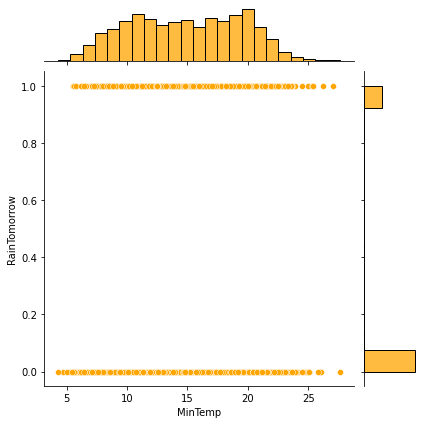

In [31]:
sns.jointplot(x = 'MinTemp', y = 'RainTomorrow', data = df, color = 'orange')

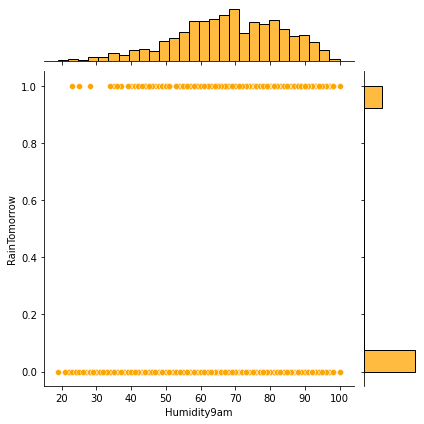

In [32]:
sns.jointplot(x = 'Humidity9am', y = 'RainTomorrow', data = df, color = 'orange')

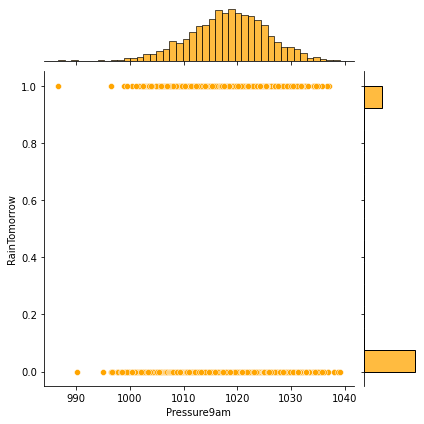

In [33]:
sns.jointplot(x = 'Pressure9am', y = 'RainTomorrow', data = df, color = 'orange')

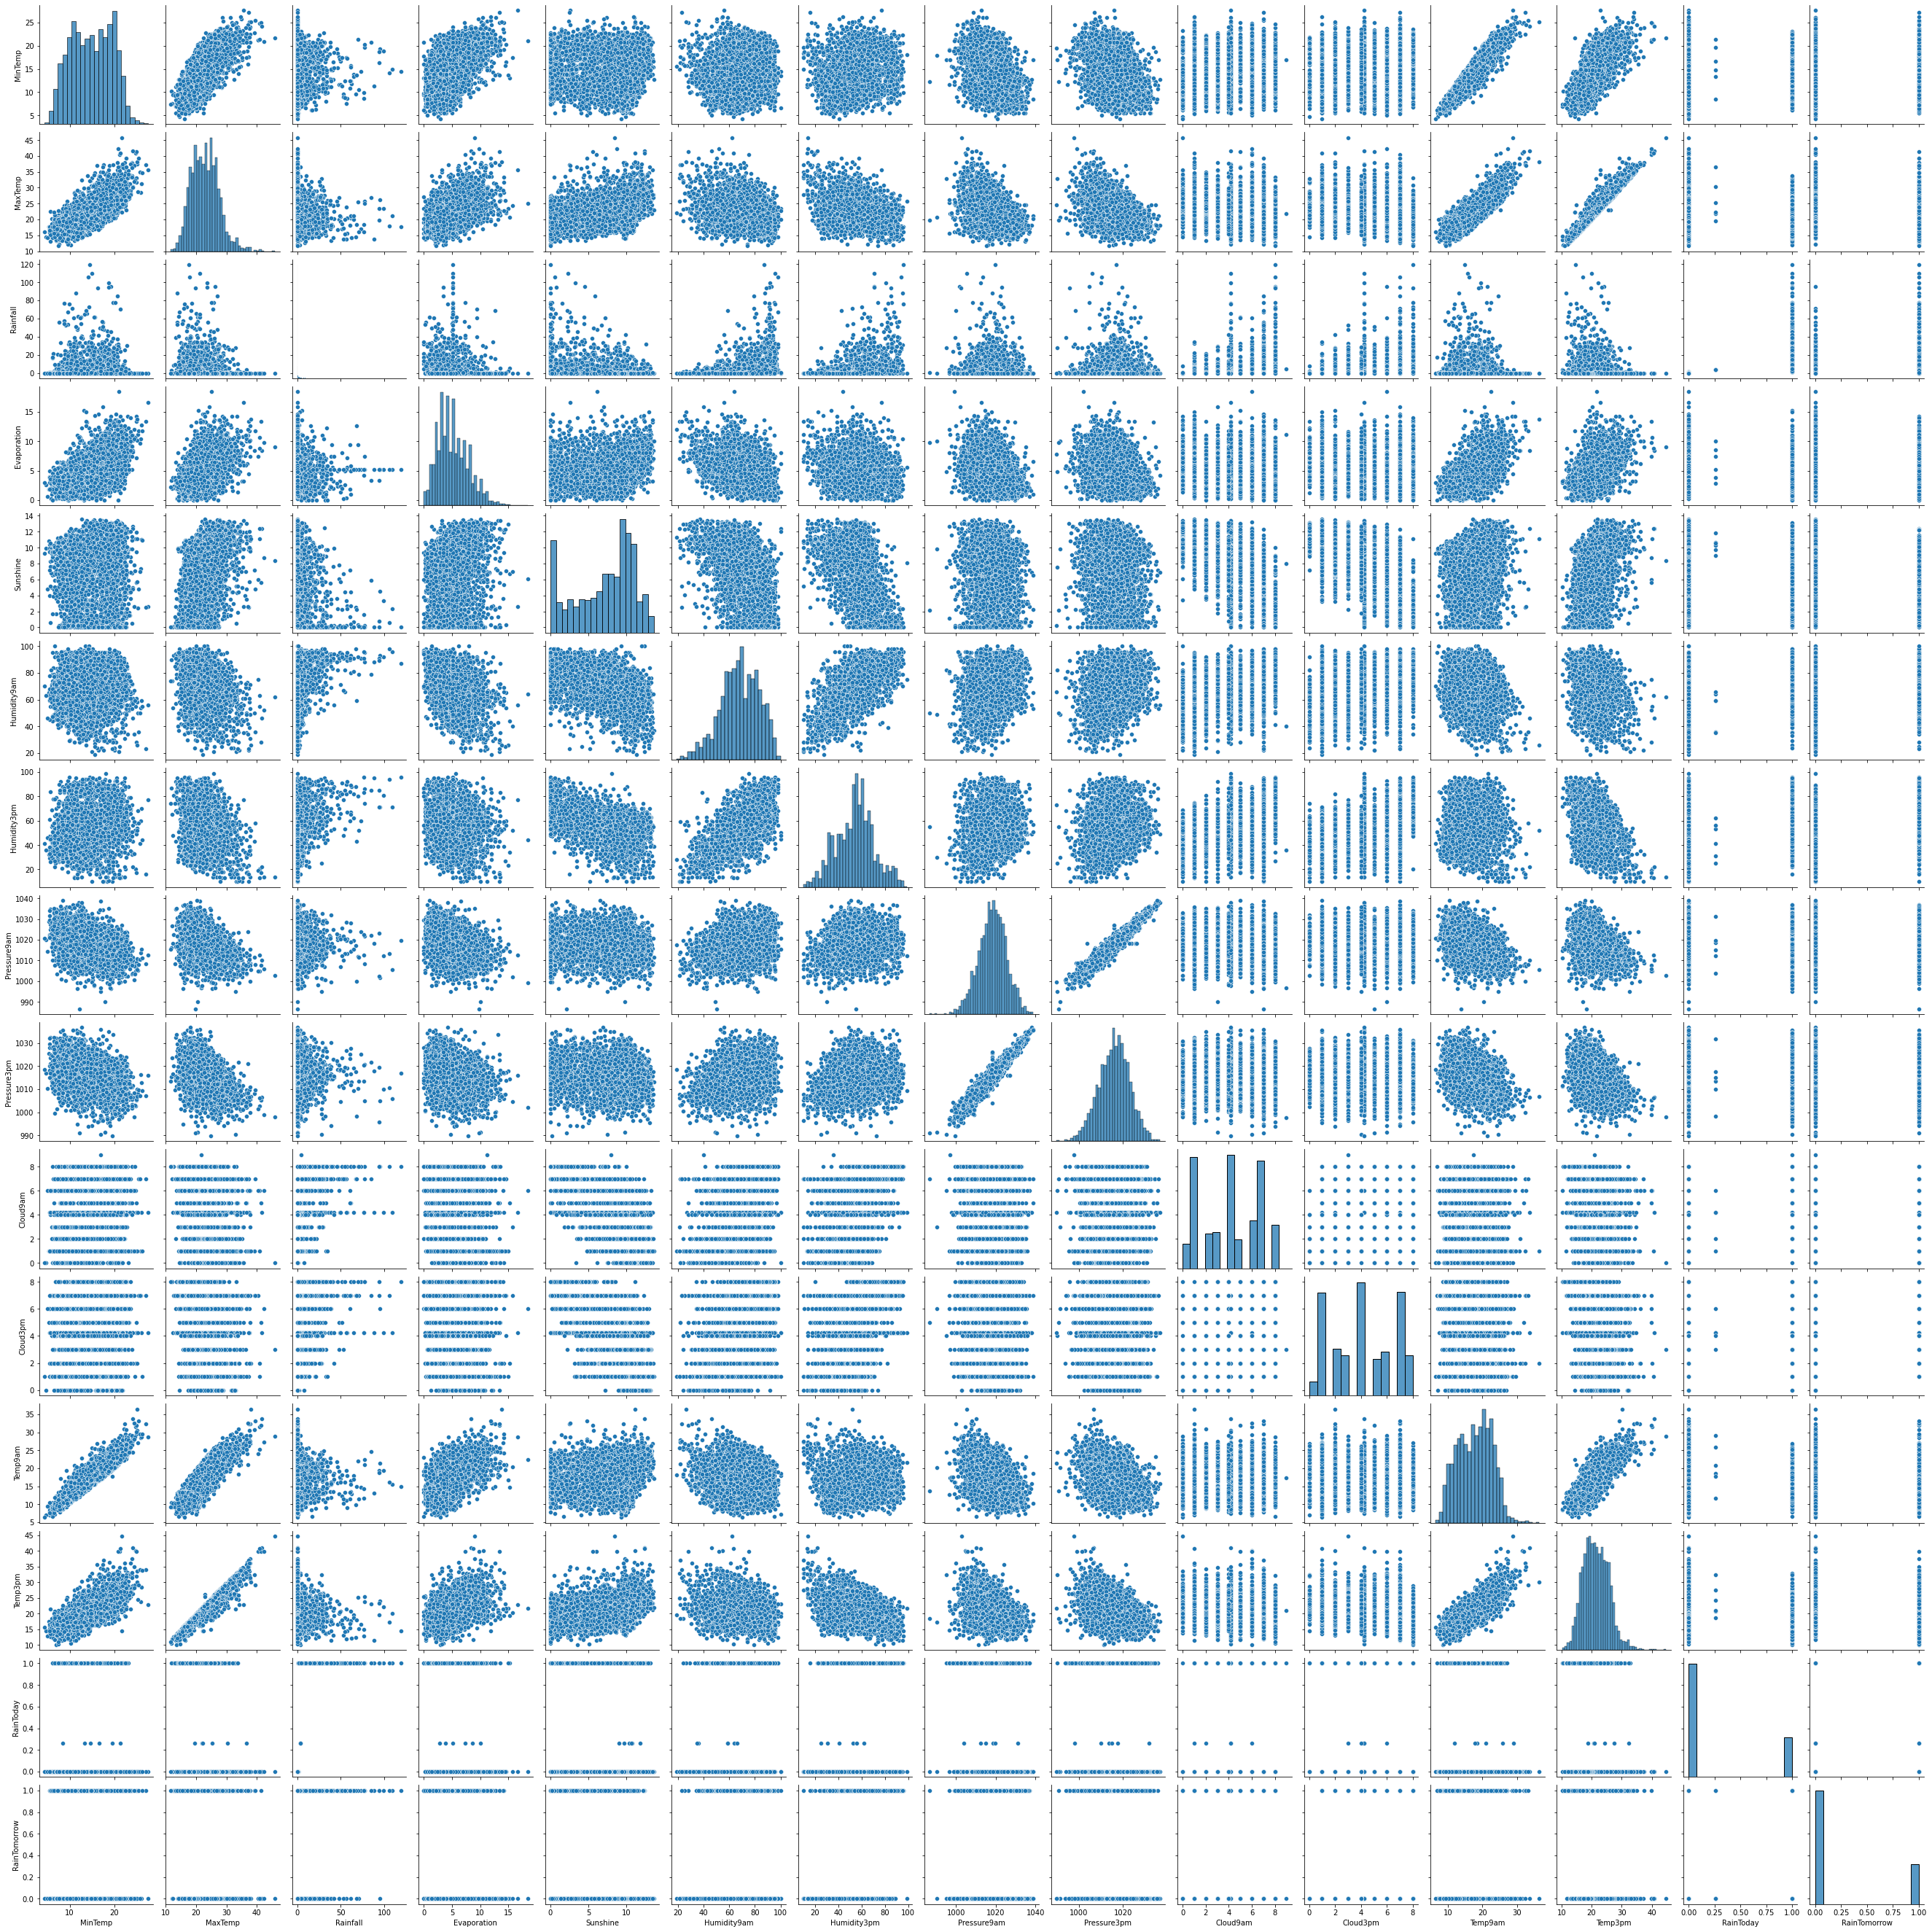

In [34]:
sns.pairplot(df)

### Creating dependent and independent variables

In [35]:
x_multi = df.drop('RainTomorrow', axis= 1)
y_multi = df['RainTomorrow']

### Performing Train_Test_Split with test_size = 0.2

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size = 0.2, random_state = 42)

### Performing Standard Scaling on created variables

In [37]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s = scaler.transform(x_test)

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
df_lr = LogisticRegression()
df_lr.fit(x_train_s, y_train)

LogisticRegression()

In [39]:
y_train_pred = df_lr.predict(x_train_s)
y_test_pred = df_lr.predict(x_test_s)

In [40]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score
print('confusion_matrix:', confusion_matrix(y_test, y_test_pred))
print('precision_score:', precision_score(y_test, y_test_pred))
print('recall_score:', recall_score(y_test, y_test_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_pred))

confusion_matrix: [[453  31]
 [ 87  97]]
precision_score: 0.7578125
recall_score: 0.5271739130434783
accuracy_score: 0.8233532934131736
roc_auc_score: 0.7315621631333094


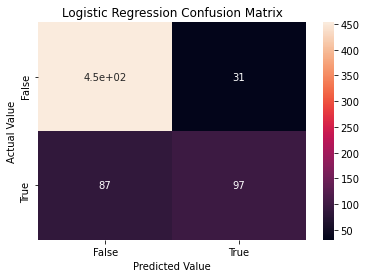

In [41]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, color = 'Pink', annot=True, xticklabels = [False, True], yticklabels = [False, True])
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [42]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, roc_curve, auc

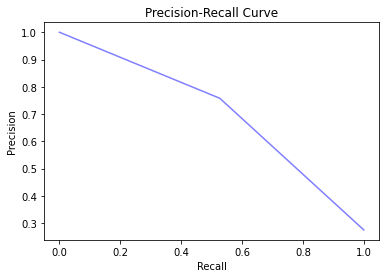

In [44]:
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
plt.plot(recall, precision, color='blue', alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [45]:
fpr, tpr, threshold = roc_curve(y_test, y_test_pred)

In [46]:
auc_roc = auc(fpr,tpr)

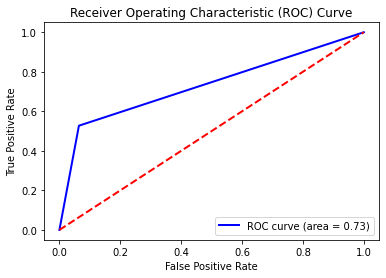

In [47]:
plt.plot(fpr, tpr, color = 'blue', label = f'ROC curve (area = {auc_roc:.2f})', lw=2)
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Linear Discriminant Analysis

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
df_lda = LinearDiscriminantAnalysis()
df_lda.fit(x_train_s, y_train)

LinearDiscriminantAnalysis()

In [49]:
y_train_lda_pred = df_lda.predict(x_train_s)

In [50]:
y_test_lda_pred = df_lda.predict(x_test_s)

In [51]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_lda_pred))
print('precision_score:', precision_score(y_test, y_test_lda_pred))
print('recall_score:', recall_score(y_test, y_test_lda_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_lda_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_lda_pred))

confusion_matrix: [[446  38]
 [ 82 102]]
precision_score: 0.7285714285714285
recall_score: 0.5543478260869565
accuracy_score: 0.8203592814371258
roc_auc_score: 0.7379177146963709


In [52]:
cm1 = confusion_matrix(y_test, y_test_lda_pred)

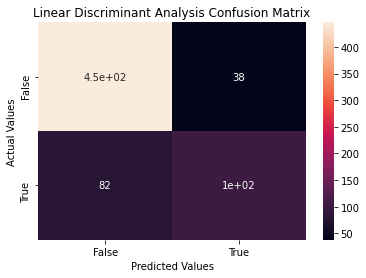

In [53]:
sns.heatmap(cm1, color = 'Purple', annot = True, xticklabels = [False, True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Linear Discriminant Analysis Confusion Matrix')
plt.show()

In [54]:
precision1, recall1,_ = precision_recall_curve(y_test, y_test_lda_pred)

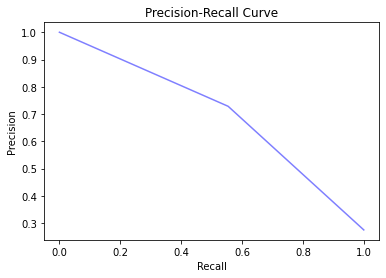

In [55]:
plt.plot(recall1, precision1, color='blue', alpha=0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [56]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_test_lda_pred)

In [57]:
auc_roc1 = auc(fpr1,tpr1)

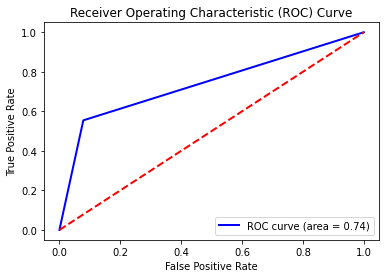

In [58]:
plt.plot(fpr1, tpr1, color = 'blue', label = f'ROC curve (area = {auc_roc1:.2f})', lw=2)
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### K- Nearest Neighbors Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
df_knn = KNeighborsClassifier(n_neighbors = 5)
df_knn.fit(x_train_s, y_train)

KNeighborsClassifier()

In [60]:
y_train_knn_pred = df_knn.predict(x_train_s)
y_test_knn_pred = df_knn.predict(x_test_s)

In [61]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_knn_pred))
print('precision_score:', precision_score(y_test, y_test_knn_pred))
print('recall_score:', recall_score(y_test, y_test_knn_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_knn_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_knn_pred))

confusion_matrix: [[437  47]
 [ 92  92]]
precision_score: 0.6618705035971223
recall_score: 0.5
accuracy_score: 0.7919161676646707
roc_auc_score: 0.7014462809917357


### K- Nearest Neighbors Classifier with GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV
# Creating a dictionary
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
df_knn_gscv = GridSearchCV(KNeighborsClassifier(), params)
df_knn_gscv.fit(x_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [63]:
df_knn_gscv.best_params_

{'n_neighbors': 9}

In [64]:
df_knn_gscv1 = df_knn_gscv.best_estimator_

In [65]:
df_knn_gscv1

KNeighborsClassifier(n_neighbors=9)

In [66]:
y_train_knngscv_pred = df_knn_gscv1.predict(x_train_s)
y_test_knngscv_pred = df_knn_gscv1.predict(x_test_s)

In [67]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_knngscv_pred))
print('precision_score:', precision_score(y_test, y_test_knngscv_pred))
print('recall_score:', recall_score(y_test, y_test_knngscv_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_knngscv_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_knngscv_pred))

confusion_matrix: [[443  41]
 [ 90  94]]
precision_score: 0.6962962962962963
recall_score: 0.5108695652173914
accuracy_score: 0.8038922155688623
roc_auc_score: 0.7130794107078693


In [68]:
cm2 = confusion_matrix(y_test, y_test_knngscv_pred)

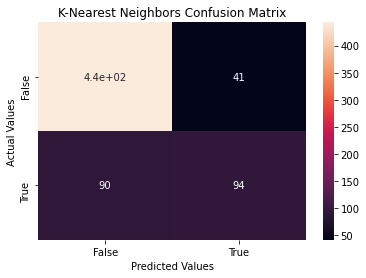

In [69]:
sns.heatmap(cm2, color = 'Purple', annot = True, xticklabels = [False, True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

In [70]:
precision, recall, _ = precision_recall_curve(y_test, y_test_knngscv_pred)

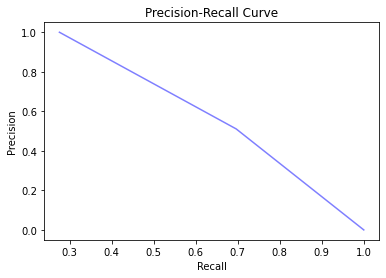

In [72]:
plt.plot(precision, recall, color = 'blue', alpha = 0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [73]:
fpr2, tpr2, threshold2 = roc_curve(y_test, y_test_knngscv_pred)

In [74]:
auc_roc2 = auc(fpr2,tpr2)

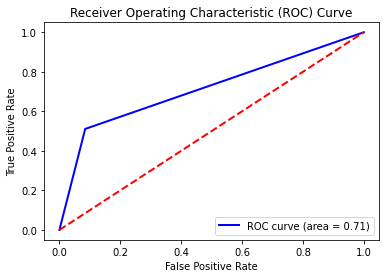

In [75]:
plt.plot(fpr2, tpr2, color = 'blue', label = f'ROC curve (area = {auc_roc2:.2f})', lw=2)
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Decision Tree Classifier

In [76]:
from sklearn import tree
df_dt = tree.DecisionTreeClassifier()
df_dt.fit(x_train_s, y_train)

DecisionTreeClassifier()

In [77]:
y_train_dt_pred = df_dt.predict(x_train_s)
y_test_dt_pred = df_dt.predict(x_test_s)

In [78]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_dt_pred))
print('precision_score:', precision_score(y_test, y_test_dt_pred))
print('recall_score:', recall_score(y_test, y_test_dt_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_dt_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_dt_pred))

confusion_matrix: [[400  84]
 [ 78 106]]
precision_score: 0.5578947368421052
recall_score: 0.5760869565217391
accuracy_score: 0.7574850299401198
roc_auc_score: 0.7012666187567375


### Decision Tree with depth control

In [80]:
df_dt1 = tree.DecisionTreeClassifier(max_depth = 3)

In [81]:
df_dt1.fit(x_train_s, y_train)

DecisionTreeClassifier(max_depth=3)

In [82]:
y_train_df_dt1_pred = df_dt1.predict(x_train_s)

In [83]:
y_test_df_dt1_pred = df_dt1.predict(x_test_s)

In [84]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_df_dt1_pred))
print('precision_score:', precision_score(y_test, y_test_df_dt1_pred))
print('recall_score:', recall_score(y_test, y_test_df_dt1_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_df_dt1_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_df_dt1_pred))

confusion_matrix: [[435  49]
 [ 85  99]]
precision_score: 0.668918918918919
recall_score: 0.5380434782608695
accuracy_score: 0.7994011976047904
roc_auc_score: 0.718401904419691


In [85]:
cm2 = confusion_matrix(y_test, y_test_df_dt1_pred)

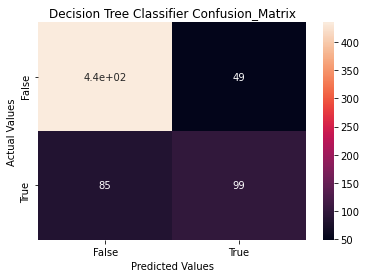

In [86]:
sns.heatmap(cm2, color = 'Purple', annot = True, xticklabels = [False,True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Decision Tree Classifier Confusion_Matrix')
plt.show()

In [87]:
precision, recall, _ = precision_recall_curve(y_test, y_test_df_dt1_pred)

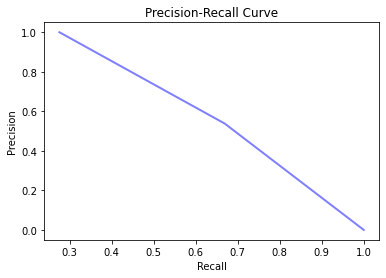

In [88]:
plt.plot(precision, recall, color = 'blue', lw = 2, alpha =0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [89]:
fpr3, tpr3, threshold3 = roc_curve(y_test,y_test_df_dt1_pred)

In [90]:
auc_roc3 = auc(fpr3,tpr3)

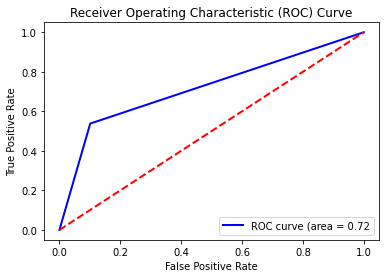

In [91]:
plt.plot(fpr3, tpr3, color = 'blue', lw=2, label = f'ROC curve (area = {auc_roc3:.2f}')
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Bagging Classification

In [92]:
from sklearn.ensemble import BaggingClassifier
df_tree = tree.DecisionTreeClassifier()
df_bagg = BaggingClassifier(base_estimator = df_tree, n_estimators = 250, bootstrap = True, n_jobs= -1, random_state = 42)

In [93]:
df_bagg.fit(x_train_s, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=250,
                  n_jobs=-1, random_state=42)

In [94]:
y_train_bagg_pred = df_bagg.predict(x_train_s)
y_test_bagg_pred = df_bagg.predict(x_test_s)

In [95]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_bagg_pred))
print('precision_score:', precision_score(y_test, y_test_bagg_pred))
print('recall_score:', recall_score(y_test, y_test_bagg_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_bagg_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_bagg_pred))

confusion_matrix: [[448  36]
 [ 84 100]]
precision_score: 0.7352941176470589
recall_score: 0.5434782608695652
accuracy_score: 0.8203592814371258
roc_auc_score: 0.7345490477901545


### Bagging classification with GridSearchCV

In [96]:
params1 = {'n_estimators': [150,250,350,500],
          'max_features': [4,5,6,7,8,9],
          'max_samples': [3,5,7]}

In [97]:
df_bagg_gscv = GridSearchCV(df_bagg, params1, n_jobs = -1, cv= 5, scoring = 'accuracy')

In [98]:
df_bagg_gscv.fit(x_train_s, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         n_estimators=250, n_jobs=-1,
                                         random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9],
                         'max_samples': [3, 5, 7],
                         'n_estimators': [150, 250, 350, 500]},
             scoring='accuracy')

In [99]:
df_bagg_gscv.best_params_

{'max_features': 9, 'max_samples': 7, 'n_estimators': 500}

In [100]:
df_bagg_gscv1 = df_bagg_gscv.best_estimator_

In [101]:
y_train_bagg_gscv1_pred  = df_bagg_gscv1.predict(x_train_s)

In [102]:
y_test_bagg_gscv1_pred  = df_bagg_gscv1.predict(x_test_s)

In [103]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_bagg_gscv1_pred))
print('precision_score:', precision_score(y_test, y_test_bagg_gscv1_pred))
print('recall_score:', recall_score(y_test, y_test_bagg_gscv1_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_bagg_gscv1_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_bagg_gscv1_pred))

confusion_matrix: [[482   2]
 [150  34]]
precision_score: 0.9444444444444444
recall_score: 0.18478260869565216
accuracy_score: 0.7724550898203593
roc_auc_score: 0.5903251886453467


In [104]:
cm3 = confusion_matrix(y_test, y_test_bagg_gscv1_pred)

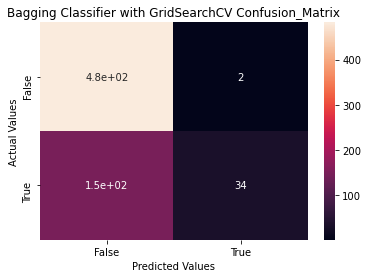

In [105]:
sns.heatmap(cm3, color = 'Purple', annot = True, xticklabels = [False,True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Bagging Classifier with GridSearchCV Confusion_Matrix')
plt.show()

In [106]:
precision5, recall5, _ = precision_recall_curve(y_test, y_test_bagg_gscv1_pred)

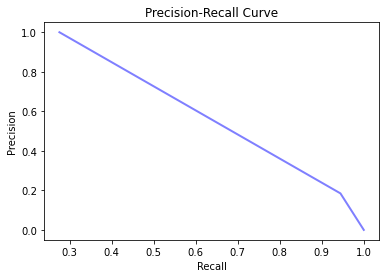

In [107]:
plt.plot(precision5, recall5, color = 'blue', lw = 2, alpha =0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [108]:
fpr5, tpr5, threshold5 = roc_curve(y_test, y_test_bagg_gscv1_pred)

In [109]:
auc_roc5 = auc(fpr5, tpr5)

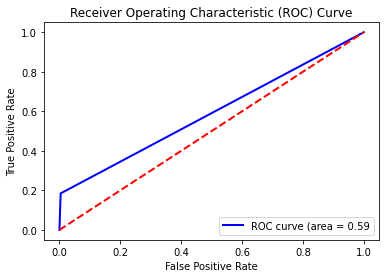

In [110]:
plt.plot(fpr5, tpr5, color = 'blue', lw=2, label = f'ROC curve (area = {auc_roc5:.2f}')
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
df_rfc = RandomForestClassifier(n_estimators = 250, n_jobs = -1, random_state = 42)
df_rfc.fit(x_train_s, y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

In [112]:
y_train_rfc_pred = df_rfc.predict(x_train_s)

In [113]:
y_test_rfc_pred = df_rfc.predict(x_test_s)

In [114]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_rfc_pred))
print('precision_score:', precision_score(y_test, y_test_rfc_pred))
print('recall_score:', recall_score(y_test, y_test_rfc_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_rfc_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_rfc_pred))

confusion_matrix: [[451  33]
 [ 86  98]]
precision_score: 0.7480916030534351
recall_score: 0.532608695652174
accuracy_score: 0.8218562874251497
roc_auc_score: 0.732213438735178


### Random Forest Classifier with GridSearchCV

In [115]:
df_rfc1 = RandomForestClassifier(n_estimators = 250, random_state = 42)

In [116]:
params2 = {'min_samples_split': [3,5,7,9],
          'max_features': [4,6,8,10],
          'max_depth': [3,4,5]}

In [117]:
params2 = {'min_samples_split': [3,5,7,9],
          'max_features': [4,6,8,10],
          'max_depth': [3,4,5]}

In [119]:
df_rfc_gscv = GridSearchCV(df_rfc1, params2, n_jobs = -1, cv= 5, scoring= 'accuracy')

In [120]:
df_rfc_gscv.fit(x_train_s, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [4, 6, 8, 10],
                         'min_samples_split': [3, 5, 7, 9]},
             scoring='accuracy')

In [121]:
df_rfc_gscv.best_params_

{'max_depth': 5, 'max_features': 4, 'min_samples_split': 3}

In [122]:
df_rfc_gscv1 = df_rfc_gscv.best_estimator_

In [123]:
y_train_rfc_gscv1_pred = df_rfc_gscv1.predict(x_train_s)

In [124]:
y_test_rfc_gscv1_pred = df_rfc_gscv1.predict(x_test_s)

In [125]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_rfc_gscv1_pred))
print('precision_score:', precision_score(y_test, y_test_rfc_gscv1_pred))
print('recall_score:', recall_score(y_test, y_test_rfc_gscv1_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_rfc_gscv1_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_rfc_gscv1_pred))

confusion_matrix: [[461  23]
 [ 94  90]]
precision_score: 0.7964601769911505
recall_score: 0.4891304347826087
accuracy_score: 0.8248502994011976
roc_auc_score: 0.720804886812792


In [126]:
cm4 = confusion_matrix(y_test, y_test_rfc_gscv1_pred)

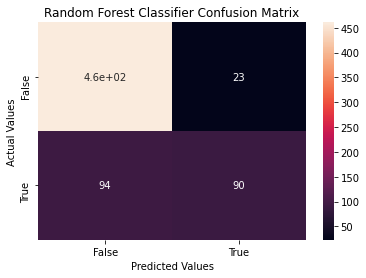

In [127]:
sns.heatmap(cm4, color = 'Purple', annot = True, xticklabels = [False, True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

In [128]:
precision6, recall6, _  = precision_recall_curve(y_test, y_test_rfc_gscv1_pred)

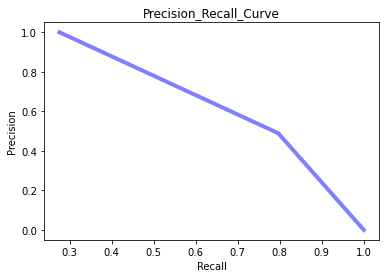

In [129]:
plt.plot(precision6, recall6, color = 'blue', lw = 4, alpha = 0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve')
plt.show()

In [130]:
fpr6, tpr6, threshold6 = roc_curve(y_test, y_test_rfc_gscv1_pred)

In [131]:
auc_roc6 = auc(fpr6, tpr6)

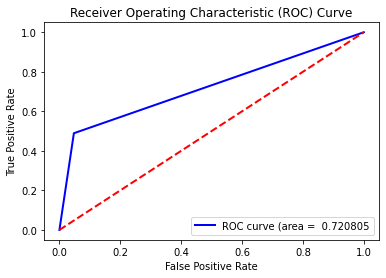

In [132]:
plt.plot(fpr6, tpr6, color = 'blue', lw = 2, label = f'ROC curve (area = {auc_roc6: 2f}')
plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()   

### Gradient Boosting with GridSearchCV

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
df_gbc = GradientBoostingClassifier()

In [134]:
params_gbc = {'learning_rate': [0.1,0.2,0.3,0.4],
             'max_depth': [3,4,5,6],
             'n_estimators': [250,500,750]}

In [135]:
df_gbc_cv = GridSearchCV(df_gbc, params_gbc, cv = 5, n_jobs = -1, scoring = 'accuracy')

In [136]:
df_gbc_cv.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [250, 500, 750]},
             scoring='accuracy')

In [137]:
df_gbc_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 250}

In [138]:
df_gbc_cv1 = df_gbc_cv.best_estimator_

In [139]:
df_gbc_cv1

GradientBoostingClassifier(max_depth=6, n_estimators=250)

In [140]:
df_gbc_cv1.fit(x_train_s, y_train)

GradientBoostingClassifier(max_depth=6, n_estimators=250)

In [141]:
y_train_gbc_pred = df_gbc_cv1.predict(x_train_s)

In [142]:
y_test_gbc_pred = df_gbc_cv1.predict(x_test_s)

In [143]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_gbc_pred))
print('precision_score:', precision_score(y_test, y_test_gbc_pred))
print('recall_score:', recall_score(y_test, y_test_gbc_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_gbc_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_gbc_pred))

confusion_matrix: [[435  49]
 [ 79 105]]
precision_score: 0.6818181818181818
recall_score: 0.5706521739130435
accuracy_score: 0.8083832335329342
roc_auc_score: 0.7347062522457779


In [144]:
cm7 = confusion_matrix(y_test, y_test_gbc_pred)

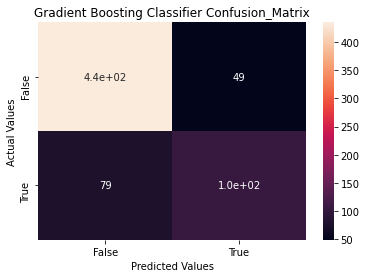

In [145]:
sns.heatmap(cm7, color= 'Purple', annot = True, xticklabels = [False, True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Gradient Boosting Classifier Confusion_Matrix')
plt.show()

In [146]:
precision7, recall7, _ = precision_recall_curve(y_test, y_test_gbc_pred)

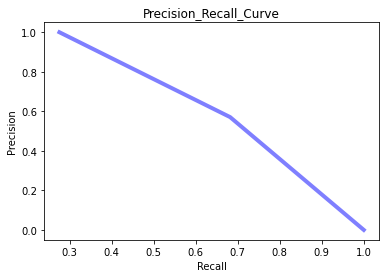

In [147]:
plt.plot(precision7, recall7, lw = 4, color = 'blue', alpha= 0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve')
plt.show()

In [148]:
fpr7, tpr7, threshold7 = roc_curve(y_test, y_test_gbc_pred)

In [149]:
auc_roc7 = auc(fpr7, tpr7)

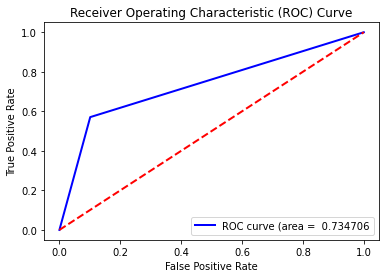

In [150]:
plt.plot(fpr7, tpr7, color = 'blue', lw = 2, label = f'ROC curve (area = {auc_roc7: 2f}')
plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

### ADA Boost Classifier with GridSearchCV

In [151]:
from sklearn.ensemble import AdaBoostClassifier
df_ada = AdaBoostClassifier()
df_ada.fit(x_train_s, y_train)

AdaBoostClassifier()

In [152]:
params_ada = {'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [500,700,900]}

In [153]:
df_ada_gscv = GridSearchCV(df_ada, params_ada, cv= 5, n_jobs = -1, scoring = 'accuracy')

In [154]:
df_ada_gscv.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'n_estimators': [500, 700, 900]},
             scoring='accuracy')

In [155]:
df_ada_gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 700}

In [156]:
df_ada_gscv1 = df_ada_gscv.best_estimator_

In [157]:
df_ada_gscv1

AdaBoostClassifier(learning_rate=0.1, n_estimators=700)

In [158]:
y_train_ada_pred = df_ada_gscv1.predict(x_train_s)

In [159]:
y_test_ada_pred = df_ada_gscv1.predict(x_test_s)

In [160]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_ada_pred))
print('precision_score:', precision_score(y_test, y_test_ada_pred))
print('recall_score:', recall_score(y_test, y_test_ada_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_ada_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_ada_pred))

confusion_matrix: [[458  26]
 [ 97  87]]
precision_score: 0.7699115044247787
recall_score: 0.47282608695652173
accuracy_score: 0.8158682634730539
roc_auc_score: 0.7095535393460294


In [161]:
cm8 = confusion_matrix(y_test, y_test_ada_pred)

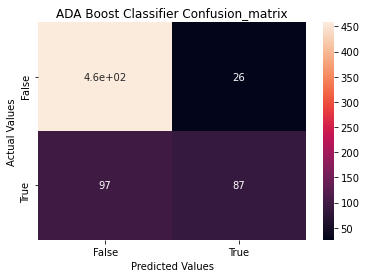

In [162]:
sns.heatmap(cm8, color= 'Purple', annot = True, xticklabels = [False, True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('ADA Boost Classifier Confusion_matrix')
plt.show()

In [163]:
precision8, recall8, _ = precision_recall_curve(y_test, y_test_ada_pred)

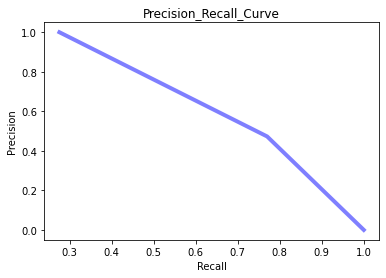

In [164]:
plt.plot(precision8, recall8, lw = 4, color = 'blue', alpha= 0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve')
plt.show()

In [165]:
fpr8, tpr8, threshold8 = roc_curve(y_test, y_test_ada_pred)

In [166]:
auc_roc8 = auc(fpr8, tpr8)

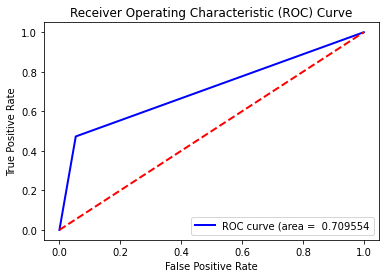

In [168]:
plt.plot(fpr8, tpr8, color = 'blue', lw = 2, label = f'ROC curve (area = {auc_roc8: 2f}')
plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

In [169]:
features = df_ada.feature_importances_
feature_names = x_train.columns

In [170]:
order = np.argsort(features)[::-1]

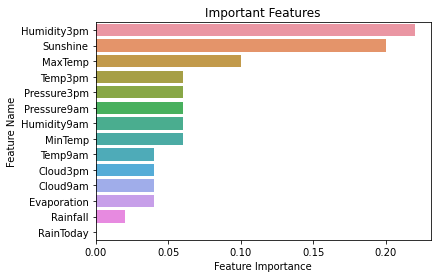

In [171]:
sns.barplot(x = features[order], y= feature_names[order])
plt.title('Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

### XG Boost Classifier with GridSearchCV

In [172]:
import xgboost as xgb
df_xgb = xgb.XGBClassifier()

In [173]:
params_xgb = {'max_depth': [3,4,5],
             'gamma': [0.1,0.2,0.3],
             'subsample': [0.8, 0.9],
             'colsample_bytree': [0.8, 0.9],
             'n_estimators': [250,500,750]}

In [174]:
df_xgb_gscv = GridSearchCV(df_xgb, params_xgb, cv = 5, n_jobs = -1, scoring = 'accuracy')

In [175]:
df_xgb_gscv.fit(x_train_s, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': [3, 4, 5],
                         'n_estimators': [250, 500, 750],
                         'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [176]:
df_xgb_gscv.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 3,
 'n_estimators': 250,
 'subsample': 0.9}

In [177]:
df_xgb_gscv1 = df_xgb_gscv.best_estimator_

In [178]:
df_xgb_gscv1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [179]:
df_xgb_gscv1.fit(x_train_s, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [180]:
y_train_xgb_pred = df_xgb_gscv1.predict(x_train_s)

In [181]:
y_test_xgb_pred = df_xgb_gscv1.predict(x_test_s)

In [182]:
print('confusion_matrix:', confusion_matrix(y_test, y_test_xgb_pred))
print('precision_score:', precision_score(y_test, y_test_xgb_pred))
print('recall_score:', recall_score(y_test, y_test_xgb_pred))
print('accuracy_score:', accuracy_score(y_test, y_test_xgb_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_test_xgb_pred))

confusion_matrix: [[430  54]
 [ 83 101]]
precision_score: 0.6516129032258065
recall_score: 0.5489130434782609
accuracy_score: 0.7949101796407185
roc_auc_score: 0.7186713977721882


In [183]:
df_xgb1 = xgb.XGBClassifier(colsample_bytree = 0.9, gamma = 0.1, max_depth = 5, n_estimators = 500, subsample = 0.9)

In [184]:
df_xgb1.fit(x_train_s, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [185]:
features1 = df_xgb1.feature_importances_
feature_names1 = x_train.columns

In [186]:
order1 = np.argsort(features1)[::-1]

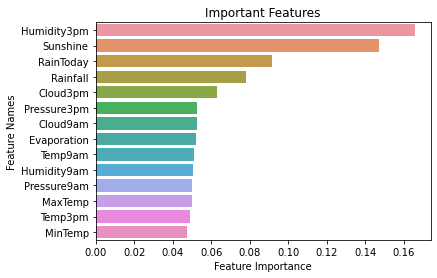

In [187]:
sns.barplot(x = features1[order1], y = feature_names1[order1])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Important Features')
plt.show()

In [188]:
cm9 = confusion_matrix(y_test, y_test_xgb_pred)

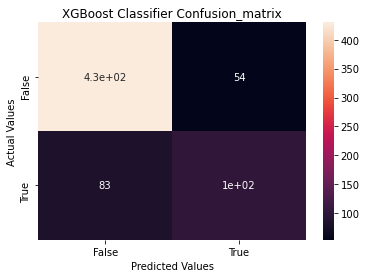

In [189]:
sns.heatmap(cm9, color= 'Purple', annot = True, xticklabels = [False, True], yticklabels = [False, True])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('XGBoost Classifier Confusion_matrix')
plt.show()

In [190]:
precision9, recall9, _ = precision_recall_curve(y_test, y_test_xgb_pred)

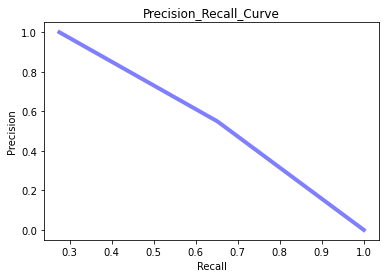

In [191]:
plt.plot(precision9, recall9, lw = 4, color = 'blue', alpha= 0.5)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision_Recall_Curve')
plt.show()

In [192]:
fpr9, tpr9, threshold9 = roc_curve(y_test, y_test_xgb_pred)

In [193]:
auc_roc9 = auc(fpr9, tpr9)

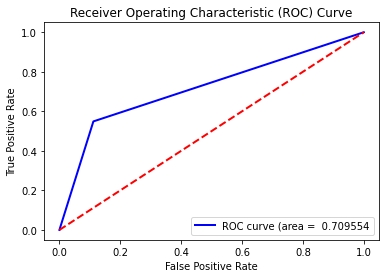

In [194]:
plt.plot(fpr9, tpr9, color = 'blue', lw = 2, label = f'ROC curve (area = {auc_roc8: 2f}')
plt.plot([0,1],[0,1], color = 'red', lw= 2, linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

### Summary of evaluation parameters of prepared models

#### Logistic Regression

confusion_matrix: [[453 31] [ 87 97]]

precision_score: 0.7578125

recall_score: 0.5271739130434783

accuracy_score: 0.8233532934131736

roc_auc_score: 0.7315621631333094

#### Linear Disciminant Model

confusion_matrix: [[446 38] [ 82 102]]

precision_score: 0.7285714285714285

recall_score: 0.5543478260869565

accuracy_score: 0.8203592814371258

roc_auc_score: 0.7379177146963709

#### K-Nearest Neighbors

confusion_matrix: [[443 41] [ 90 94]]

precision_score: 0.6962962962962963

recall_score: 0.5108695652173914

accuracy_score: 0.8038922155688623

roc_auc_score: 0.7130794107078693

#### Decision Tree Classifier

confusion_matrix: [[435 49] [ 85 99]]

precision_score: 0.668918918918919

recall_score: 0.5380434782608695

accuracy_score: 0.7994011976047904

roc_auc_score: 0.718401904419691

#### Bagging Classification

confusion_matrix: [[482 2] [150 34]]

precision_score: 0.9444444444444444

recall_score: 0.18478260869565216

accuracy_score: 0.7724550898203593

roc_auc_score: 0.5903251886453467

#### Random Forest Classifier

confusion_matrix: [[461 23] [ 94 90]]

precision_score: 0.7964601769911505

recall_score: 0.4891304347826087

accuracy_score: 0.8248502994011976

roc_auc_score: 0.720804886812792

#### Gradient Boosting

confusion_matrix: [[449 35] [ 82 102]]

precision_score: 0.7445255474452555

recall_score: 0.5543478260869565

accuracy_score: 0.8248502994011976

roc_auc_score: 0.7410168882500898

#### ADA Boosting Classifier

confusion_matrix: [[458 26] [ 97 87]]

precision_score: 0.7699115044247787

recall_score: 0.47282608695652173


accuracy_score: 0.8158682634730539

roc_auc_score: 0.7095535393460294

#### XGBoost Classification

confusion_matrix: [[430 54] [ 77 107]]

precision_score: 0.6645962732919255

recall_score: 0.5815217391304348

accuracy_score: 0.8038922155688623

roc_auc_score: 0.7349757455982754


<div style="border-radius: 10px; border: #0b0265 solid; background-color: #F0F8BB; font-size: 1.1em; letter-spacing: 0.5px; text-align: center;">
  <h1 style="color: #212529; font-weight: bold; font-family: Arial, sans-serif;">Questionnaires </h1>
</div>

### 1. Your views about the problem statement?

The problem statement requires creating a Machine Learning model to predict rainfall in Sydney using various classification models. This is a practical and impactful task as accurate rainfall predictions can aid in planning and decision-making for various sectors such as agriculture, water management, and public safety.

### 2. What will be your approach to solving this task?

The approach to solving this task involves several steps:

Data Preprocessing: Load the dataset, handle missing values, and perform necessary data cleaning.

Feature Engineering: Extract relevant features and transform them if necessary.

Model Selection: Implement various classification models including Decision Tree, Logistic Regression, K-Nearest Neighbors, and Ensemble Methods (Random Forest, Gradient Boosting, etc.).

Model Training and Evaluation: Train the models on the training data and evaluate them using metrics like accuracy, precision, recall, and ROC AUC score.

Model Comparison: Compare the performance of different models to identify the best-performing one.

Optimization: Fine-tune the best model to further improve its performance.

### 3. What were the available ML model options you had to perform this task?

The available ML model options included:

* Logistic Regression
* Linear Discriminant Analysis
* K-Nearest Neighbors
* Decision Tree Classifier
* Bagging Classifier
* Random Forest Classifier
* Gradient Boosting Classifier
* ADA Boosting Classifier
* XGBoost Classifier

### 4. Which model’s performance is best and what could be the possible reason for that?

Based on the evaluation parameters, the Gradient Boosting Classifier showed the best performance with the highest accuracy score of 0.8248 and a balanced ROC AUC score of 0.7410. The possible reasons for its superior performance are:

Handling of Complex Patterns: Gradient Boosting can handle complex data patterns by sequentially building trees that correct the errors of previous trees.

Regularization: It includes techniques to prevent overfitting, making the model generalize better on unseen data.

### 5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the Gradient Boosting Classifier, the following steps can be taken:

Hyperparameter Tuning: Perform a grid search or random search to find the optimal hyperparameters.

Feature Selection: Use feature importance scores to select the most relevant features and eliminate redundant ones.

Cross-Validation: Implement k-fold cross-validation to ensure the model's robustness and reliability.

Data Augmentation: Incorporate additional relevant features or external datasets that might provide more context and improve the model's accuracy.

Ensemble Techniques: Combine the Gradient Boosting model with other models to create a more robust ensemble model.

### Deployment

In [195]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: altair<6,>=4.0 in c:\users\91812\anaconda3\lib\site-packages (from streamlit) (5.2.0)



In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Example data (replace with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save the model to a file
joblib_file = "best_model.pkl"
joblib.dump(best_model, joblib_file)

print(f"Model saved to {joblib_file}")


Accuracy: 0.8233532934131736
Model saved to best_model.pkl


In [199]:
import streamlit as st
import pandas as pd
import joblib

# Load the model
model = joblib.load('best_model.pkl')

st.title("Rainfall Prediction in Sydney")

st.write("""
## Predict whether it will rain tomorrow based on today's weather conditions.
""")

def user_input_features():
    MinTemp = st.number_input('MinTemp', min_value=-10.0, max_value=50.0, step=0.1)
    MaxTemp = st.number_input('MaxTemp', min_value=-10.0, max_value=50.0, step=0.1)
    Rainfall = st.number_input('Rainfall', min_value=0.0, max_value=500.0, step=0.1)
    Evaporation = st.number_input('Evaporation', min_value=0.0, max_value=50.0, step=0.1)
    Sunshine = st.number_input('Sunshine', min_value=0.0, max_value=15.0, step=0.1)
    Humidity9am = st.number_input('Humidity9am', min_value=0, max_value=100, step=1)
    Humidity3pm = st.number_input('Humidity3pm', min_value=0, max_value=100, step=1)
    Pressure9am = st.number_input('Pressure9am', min_value=900.0, max_value=1100.0, step=0.1)
    Pressure3pm = st.number_input('Pressure3pm', min_value=900.0, max_value=1100.0, step=0.1)
    Cloud9am = st.number_input('Cloud9am', min_value=0, max_value=8, step=1)
    Cloud3pm = st.number_input('Cloud3pm', min_value=0, max_value=8, step=1)
    Temp9am = st.number_input('Temp9am', min_value=-10.0, max_value=50.0, step=0.1)
    Temp3pm = st.number_input('Temp3pm', min_value=-10.0, max_value=50.0, step=0.1)
    RainToday = st.selectbox('RainToday', ('No', 'Yes'))
    data = {
        'MinTemp': MinTemp,
        'MaxTemp': MaxTemp,
        'Rainfall': Rainfall,
        'Evaporation': Evaporation,
        'Sunshine': Sunshine,
        'Humidity9am': Humidity9am,
        'Humidity3pm': Humidity3pm,
        'Pressure9am': Pressure9am,
        'Pressure3pm': Pressure3pm,
        'Cloud9am': Cloud9am,
        'Cloud3pm': Cloud3pm,
        'Temp9am': Temp9am,
        'Temp3pm': Temp3pm,
        'RainToday': 1 if RainToday == 'Yes' else 0
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

st.subheader('User Input parameters')
st.write(input_df)

prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

st.subheader('Prediction')
st.write('Rain Tomorrow' if prediction[0] == 1 else 'No Rain Tomorrow')

st.subheader('Prediction Probability')
st.write(prediction_proba)


2024-06-07 21:37:51.971 
  command:

    streamlit run C:\Users\91812\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run app.py


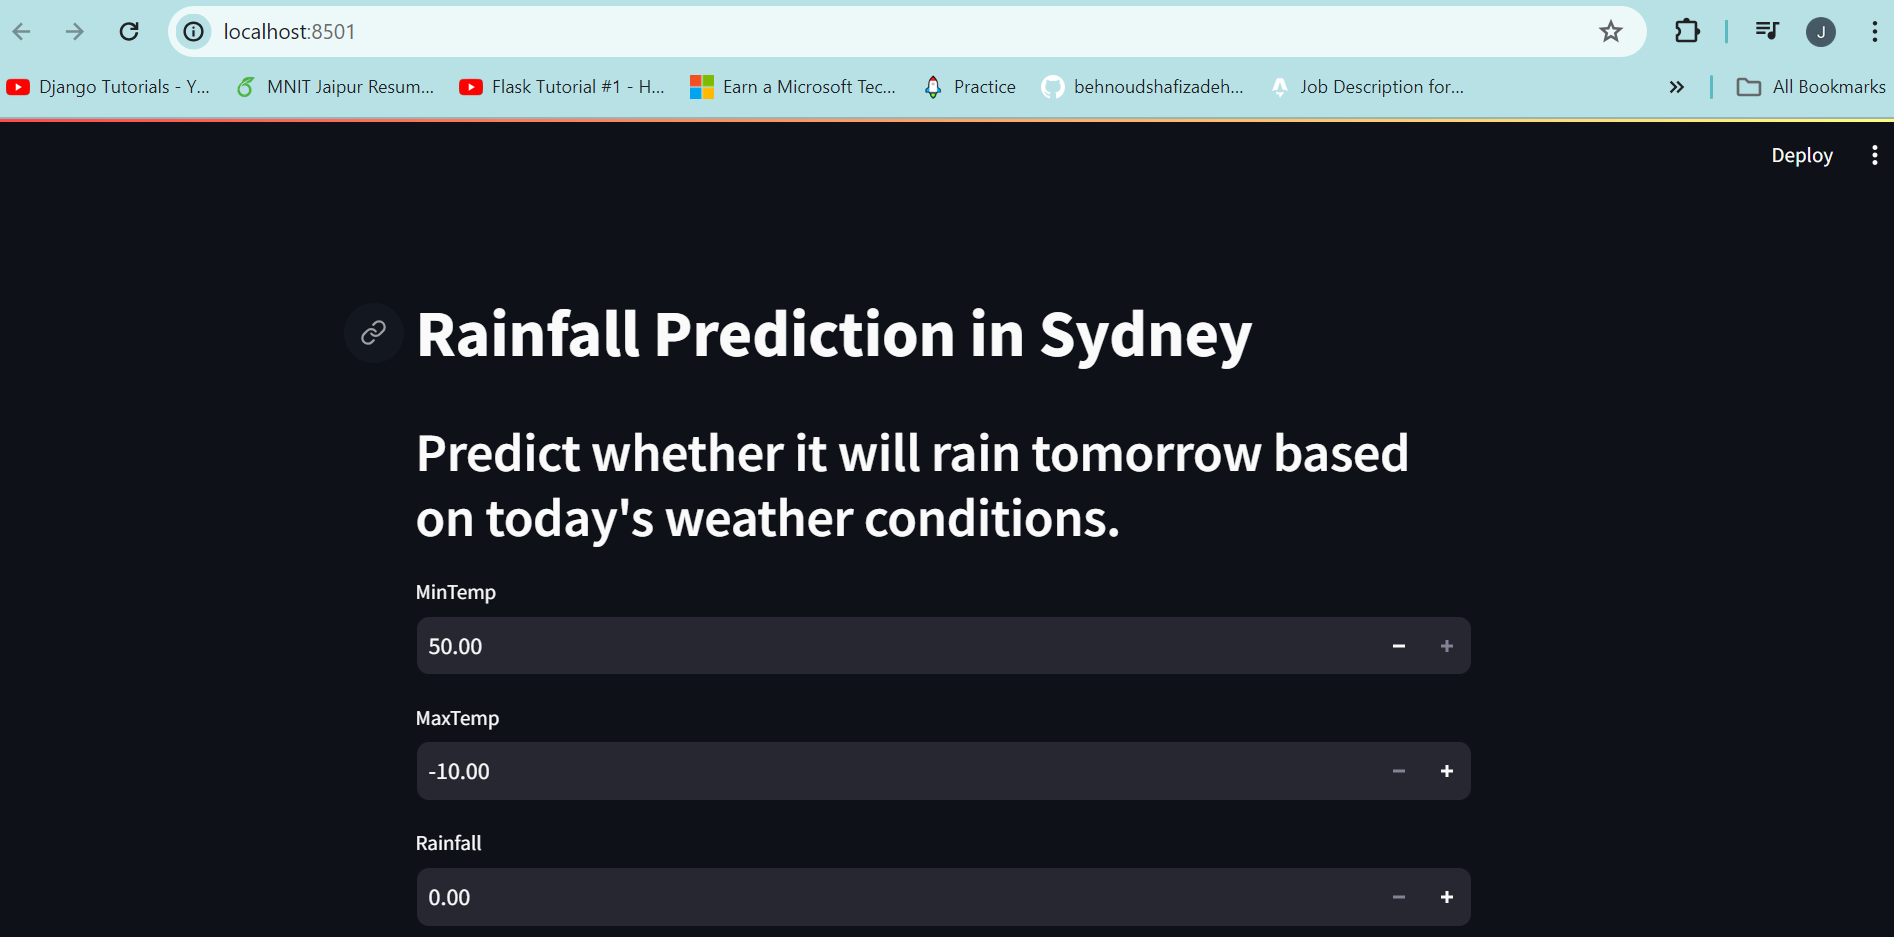